In [1]:
from sklearn.model_selection import train_test_split
from config import *
from utils import *

## Read and Process Data

In [2]:
orig_data = pd.read_csv('./data/train/train.csv')
orig_data = orig_data.dropna()
orig_data.head(1)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2


#### Investigating the quantity feature

In [3]:
multiple_pets = orig_data[orig_data['Quantity'] > 1]
num_multiple_pets = len(multiple_pets)
data_amount = len(orig_data)
percentage = (num_multiple_pets / data_amount) * 100
print("Total Amount:", data_amount)
print("Multiple Pets:", num_multiple_pets)
print("Total Percentage: ", percentage)

Total Amount: 13716
Multiple Pets: 2843
Total Percentage:  20.727617381160687


In [4]:
random_samples = multiple_pets.sample(n=200, random_state=2024)
random_samples.to_csv('./data/train/random_samples.csv', index=True)

#### (a) Original Training Data with All Textual Features Removed

Removed name, description, rescuerID and petID columns. 

In [6]:
X, y = get_data(TRAIN_PATH)
X.head(2)

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Fee,State,VideoAmt,PhotoAmt
0,2,3.0,299,0,1,1,7,0,1,1,2,2,2,1,100.0,41326,0.0,1.0
1,2,1.0,265,0,1,1,2,0,2,2,3,3,3,1,0.0,41401,0.0,2.0


In [7]:
X.shape

(10873, 18)

C:\Users\Yuri\AppData\Local\Temp\ipykernel_34184\1267351439.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_distribution = df.groupby(['Type', 'Age Group']).size().unstack(fill_value=0)


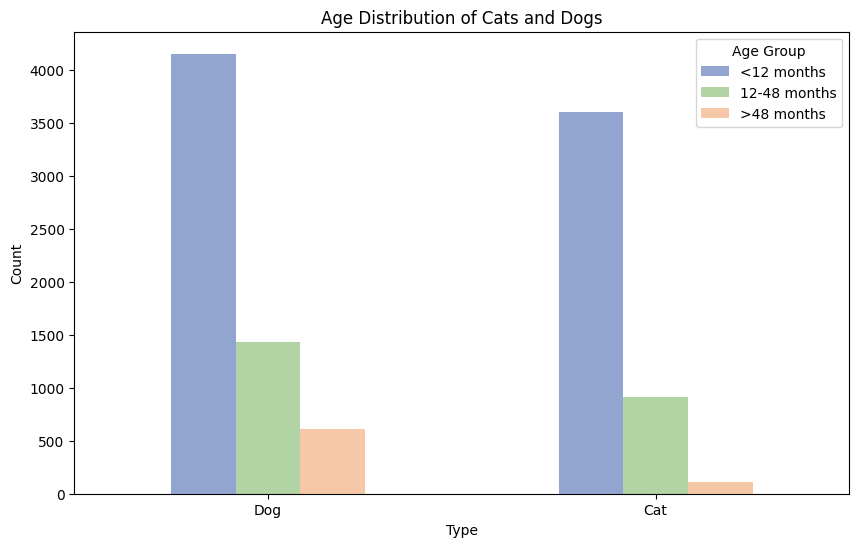

In [26]:
bins = [0, 12, 48, 120]
labels = ['<12 months', '12-48 months', '>48 months']

import matplotlib.pyplot as plt
df = X.copy()
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
type_mapping = {1: 'Dog', 2: 'Cat'}
df['Type'] = df['Type'].map(type_mapping)
age_distribution = df.groupby(['Type', 'Age Group']).size().unstack(fill_value=0)
colors = ['#92A5D1', '#B2D3A4', '#F6C8A8']
age_distribution.plot(kind='bar', figsize=(10, 6), rot=0, color=colors)
plt.title('Age Distribution of Cats and Dogs')
plt.xlabel('Type')
plt.ylabel('Count')
plt.legend(title='Age Group')
plt.show()

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)
X_train, train_scaler = normalization(X_train, numerical_features)
X_train.head(2)

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Fee,State,VideoAmt,PhotoAmt
11095,2,-0.455064,265,0,2,1,4,7,2,2,2,1,2,1,0.959304,41326,-0.174516,-0.518108
14051,1,1.878230,128,0,2,2,7,0,1,1,1,1,2,1,-0.312048,41326,-0.174516,-1.141976


In [9]:
X_val = normalization(X_val, numerical_features, train_scaler)
X_val.head(2)

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Fee,State,VideoAmt,PhotoAmt
1803,1,-0.195809,307,0,1,4,7,0,3,1,2,2,2,1,-0.312048,41336,-0.174516,-0.830042
5916,2,-0.455064,266,0,1,1,6,7,2,1,2,1,2,1,-0.312048,41324,-0.174516,0.417693


#### (b) Data with Sentiment Scores Added

A sentiment score is generated for each sentence in a pet's description by using Google's Natural Language API. For each sentence, the API provides both a sentiment score and a sentiment magnitude.

To calculate the overall sentiment score for the entire description, the product of the sentiment score and the sentiment magnitude are summed. Positive scores and negative scores are summed seperately. 

In [10]:
X_senti, y_senti = get_data(SENTIMENT_INCLUDED_TRAIN_PATH)
X_senti.head(2)

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Fee,State,VideoAmt,PhotoAmt,PositiveSentimentScore,NegativeSentimentScore
0,2,3.0,299,0,1,1,7,0,1,1,2,2,2,1,100.0,41326,0.0,1.0,2.0,-0.2
1,2,1.0,265,0,1,1,2,0,2,2,3,3,3,1,0.0,41401,0.0,2.0,0.1,-0.6


In [11]:
X_train_senti, X_val_senti, y_train_senti, y_val_senti = train_test_split(X_senti, y_senti, test_size=0.2, random_state=RANDOM_STATE)

X_train_senti, train_scaler_senti = normalization(X_train_senti, numerical_features+senti_features)
X_train_senti.head(2)

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Fee,State,VideoAmt,PhotoAmt,PositiveSentimentScore,NegativeSentimentScore
12733,1,1.267470,307,0,1,2,0,0,3,2,1,1,1,1,1.576132,41326,-0.172683,-0.817867,-0.553513,0.537000
14369,1,0.014855,141,307,1,1,0,0,2,1,3,1,1,1,-0.298230,41326,-0.172683,1.050699,0.364503,-0.474525


In [12]:
X_val_senti = normalization(X_val_senti, numerical_features+senti_features, train_scaler_senti)
X_val_senti.head(2)

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Fee,State,VideoAmt,PhotoAmt,PositiveSentimentScore,NegativeSentimentScore
14044,1,-0.507067,307,0,2,1,2,0,2,2,1,1,2,1,-0.298230,41326,-0.172683,0.427844,-0.094505,0.368412
4899,1,0.014855,205,0,2,1,7,0,1,3,1,1,2,1,7.824006,41326,-0.172683,-0.506439,1.151373,-0.305938


In [13]:
import numpy as np
np.any(y_senti.values < 0)

False